In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

#### Load data 

In [2]:
train=pd.read_csv("train_predict_loan_AV.csv")
test=pd.read_csv("test_predict_load_AV.csv")

# From problem statement.

### Variables------------------------Description
2. Loan_ID-------------------->Unique Loan ID
3. Gender--------------------->Male/ Female
4. Married-------------------->Applicant married (Y/N)
5. Dependents----------------->Number of dependents
6. Education------------------>Applicant Education (Graduate/ Under Graduate)
7. Self_Employed--------------->Self employed (Y/N)
8. ApplicantIncome------------->Applicant income
9. CoapplicantIncome----------->Coapplicant income
10. LoanAmount----------------->Loan amount in thousands
11. Loan_Amount_Term----------->Term of loan in months
12. Credit_History------------->credit history meets guidelines
13. Property_Area-------------->Urban/ Semi Urban/ Rural
14. Loan_Status---------------->(Target) Loan approved (Y/N)




#### Looking at data 

In [3]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
train.shape

(614, 13)

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
for feature in train.columns:
    print('{} feature:----> {} unique values'.format(feature,len(train[feature].value_counts())))

Loan_ID feature:----> 614 unique values
Gender feature:----> 2 unique values
Married feature:----> 2 unique values
Dependents feature:----> 4 unique values
Education feature:----> 2 unique values
Self_Employed feature:----> 2 unique values
ApplicantIncome feature:----> 505 unique values
CoapplicantIncome feature:----> 287 unique values
LoanAmount feature:----> 203 unique values
Loan_Amount_Term feature:----> 10 unique values
Credit_History feature:----> 2 unique values
Property_Area feature:----> 3 unique values
Loan_Status feature:----> 2 unique values


#### Continuous Varibale: Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount
#### rest are categorical


#### Now lets explore missing values

### Lets do univarite analysis

In [9]:
def univariate(df ,column):
    plt.figure()
    ax=sns.countplot(data=df,x=column,palette='Set2')
    total=df.shape[0]
    
    for p in ax.patches:
        height=p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total)*100),
            ha="center") 
    plt.title("count and % of {} feature".format(column))

In [10]:
## first let have look at categorical variable

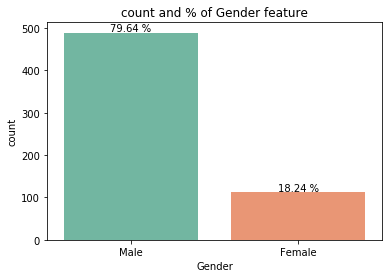

In [11]:
univariate(train,'Gender')

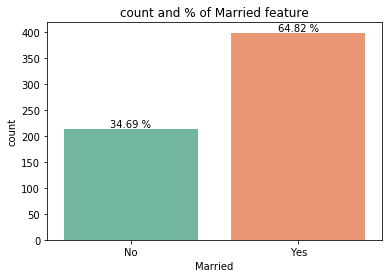

In [12]:
univariate(train,'Married')

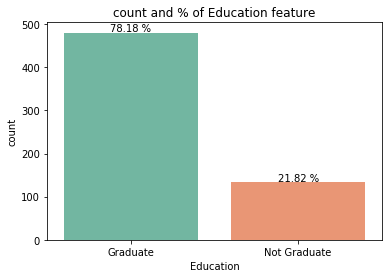

In [13]:
univariate(train,'Education')

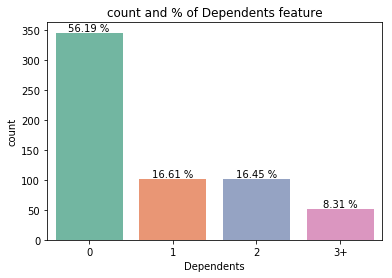

In [14]:
univariate(train,'Dependents')

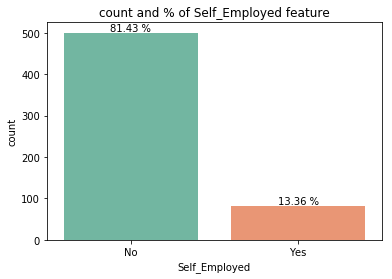

In [15]:
univariate(train,'Self_Employed')

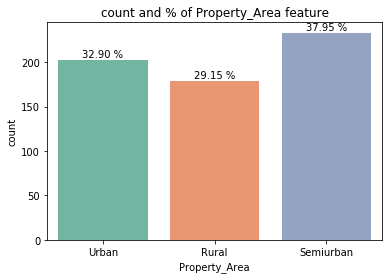

In [16]:
univariate(train,'Property_Area')

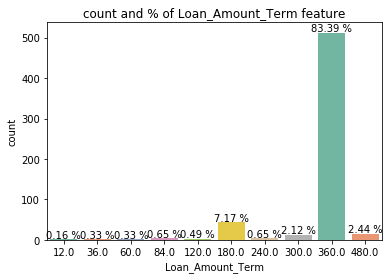

In [17]:
univariate(train,'Loan_Amount_Term')

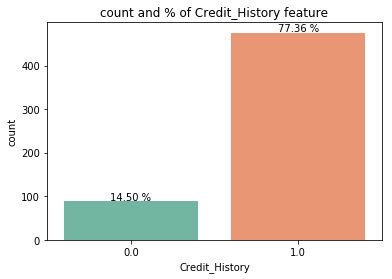

In [18]:
univariate(train,'Credit_History')

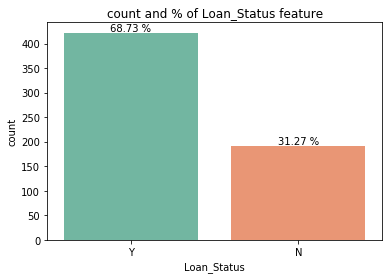

In [19]:
univariate(train,'Loan_Status')

### observation :
'''' 
1. there is relative high percentage of male (>75%) who applied for Home Loan as comopared to its female counter part
2. More Married people applied
3. more then 3/4 of applicants are graduate
4. More then half of the applicants has no dependents
5. More the 80% are not self_employed
6. people having property in every area (rural ,semi-urban,urban ) applied with no major significant differnce in numbers
7. Almost 80% meets the guidelines
8. Most of the applicants were given Loan
'''

### since target varible is object we replace N with 0 and Y with 1

In [20]:
train.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

### Let's Look at summary statistics 

In [21]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [22]:
### now lets explore continuos varible with distplot

In [23]:
def continuous(df,column):
    plt.figure(figsize=(20,10)) 
    ax=sns.distplot(df[column],rug=True,bins=50,norm_hist=False)
    plt.title('Distribution of {}'.format(column))
    #loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    #ax.xaxis.set_major_locator(loc)
    
    

/home/fasial/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


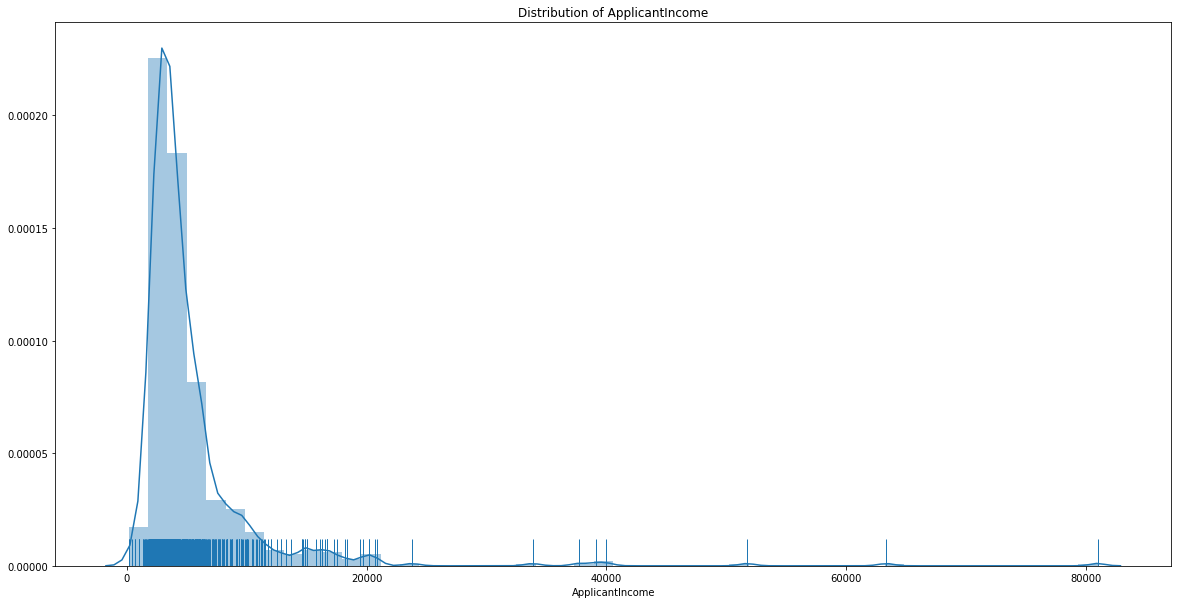

In [24]:
continuous(train,"ApplicantIncome");

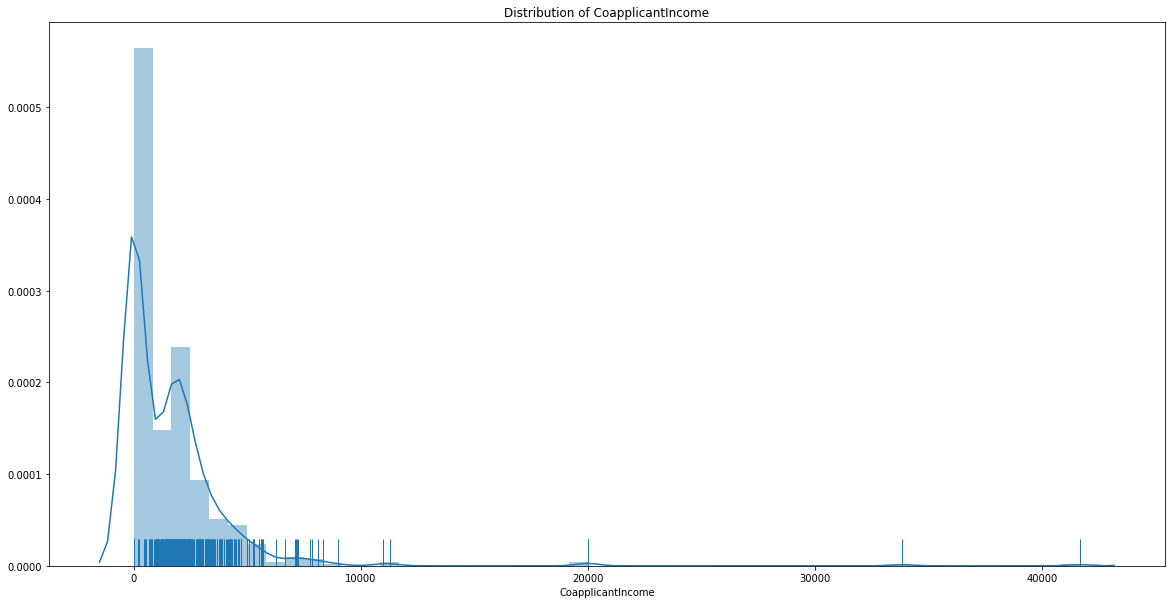

In [25]:
continuous(train,"CoapplicantIncome")

/home/fasial/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/fasial/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/fasial/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/fasial/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


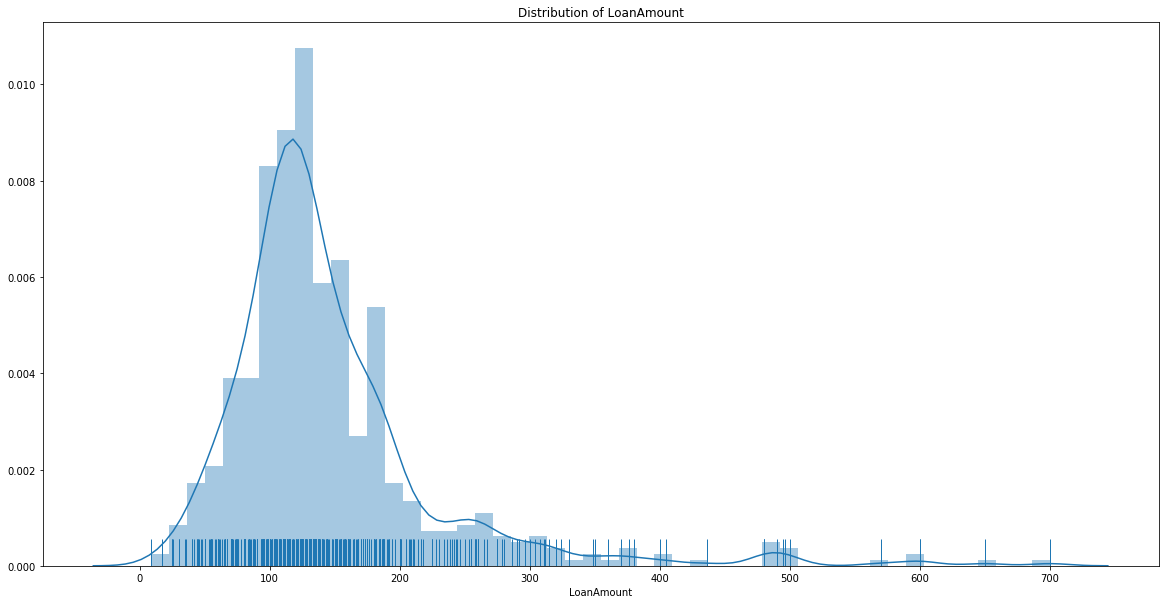

In [26]:
continuous(train,"LoanAmount");


''''
1. All three of continuous variable has outliers
2. ApplicantIncome and 'CoapplicantIncome' are skewed towards right and need tranformation for better prediction model
''''


In [27]:
#### Now lets do bivariate analysis taking each feature corresponding target variable(Loan_Status)


In [28]:
total=train.Gender.value_counts()

In [29]:
len(total)

2

In [92]:
def bivariate(df ,column,target):
    plt.figure(figsize=(8,8))
    feature=df[column].sort_values()
    ax=sns.countplot(data=df,x=target,hue=feature,dodge=True,palette="husl")
    total=train[column].value_counts().sort_index()
    # unique=len(target.value_counts())
    for i,p in enumerate(ax.patches,start=0):
        height=p.get_height()
        print(height,total[i//2])
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total[i//2])*100),
            ha="center") 
    plt.title("count and % of {} feature".format(column))
    print(df[column].value_counts())

#### starting with categorical feature

### Here percentage is calculated with respected to a particular sub -group of a feature

In [94]:
target="Loan_Status"

37 112
75 112
150 489
339 489
Male      489
Female    112
Name: Gender, dtype: int64


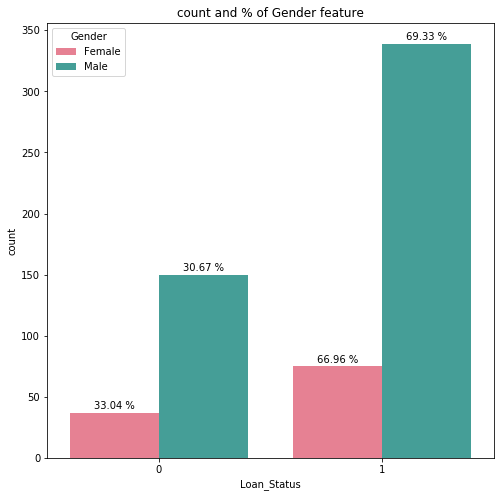

In [95]:
bivariate(train,"Gender",target)

79 213
134 213
113 398
285 398
Yes    398
No     213
Name: Married, dtype: int64


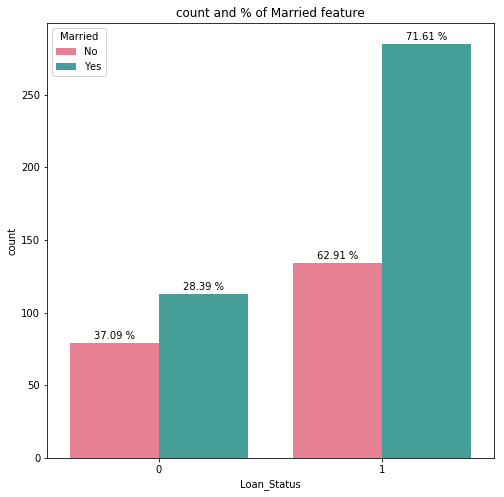

In [96]:
bivariate(train,"Married",target)

107 345
238 345
36 102
66 102
25 101
76 101
18 51
33 51
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


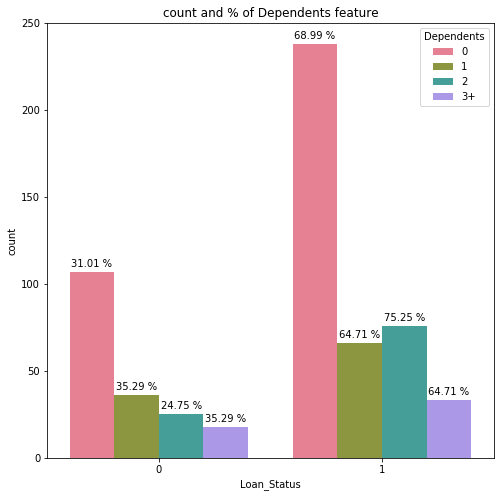

In [97]:
bivariate(train,"Dependents",target)

140 480
340 480
52 134
82 134
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


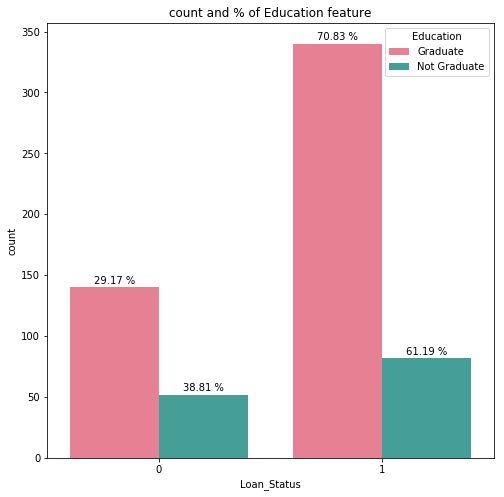

In [98]:
bivariate(train,"Education",target)

157 500
343 500
26 82
56 82
No     500
Yes     82
Name: Self_Employed, dtype: int64


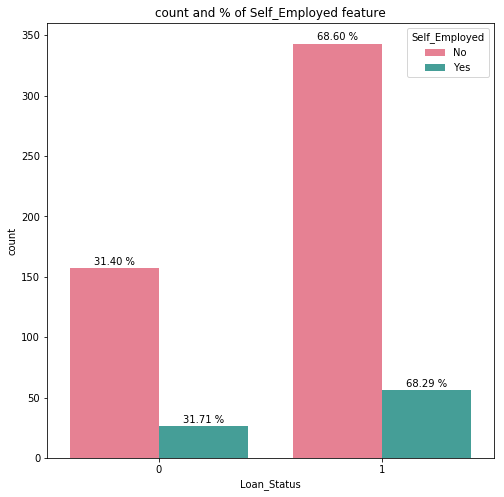

In [99]:
bivariate(train,"Self_Employed",target)

82 89
7 89
97 475
378 475
1.0    475
0.0     89
Name: Credit_History, dtype: int64


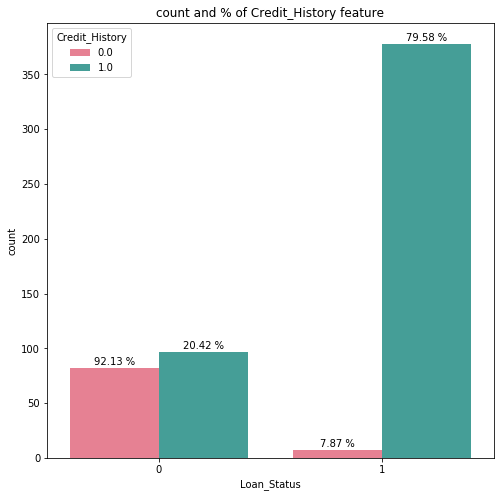

In [101]:
bivariate(train,"Credit_History",target)

69 179
110 179
54 233
179 233
69 202
133 202
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


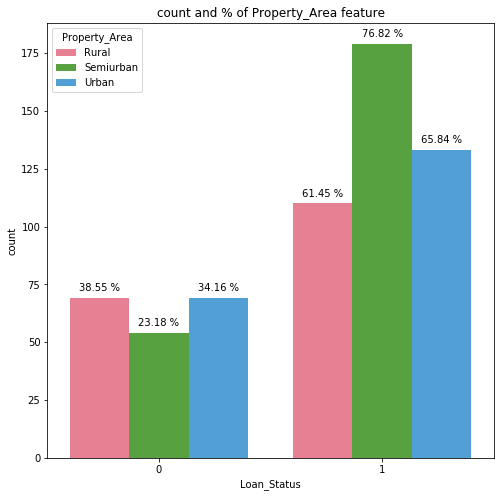

In [100]:
bivariate(train,"Property_Area",target)

### Observations

1. The number of Loan approval and rejection for both male and female is  nearly close. Hence it indicates no significant relation of target and Gender 
2. Married applicants seemed to get more approval then unmarried one.
3. Applicants with no dependents is more likely to get loan approval . we would consider converting to into two classes ,0=no dependents and 1 = with dependents
4. there is clear evidence that Graduate is more likely to get Loan_approval and vice-versa
5. both sub group of self empolyed shows similar approval and rejections w.r.t the no. of applicants in each group
6. credit history which meets guildlines have more approval then its counterparts.
7. It seems that apprval for semi urban property area is highest and rural is lowest


### Now let's explore continuous feature w.r.t target variable

In [148]:
#### first have a look at summary statistics
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,81000.000000


In [154]:
def cont_bivariate(df,column,mval):
    plt.figure(figsize=(12,8))
    sns.stripplot(y=column,data=train,x='Loan_Status',jitter=True)
    plt.ylim(0,mval)
    plt.title("Loan_status and {} plot".format(column))

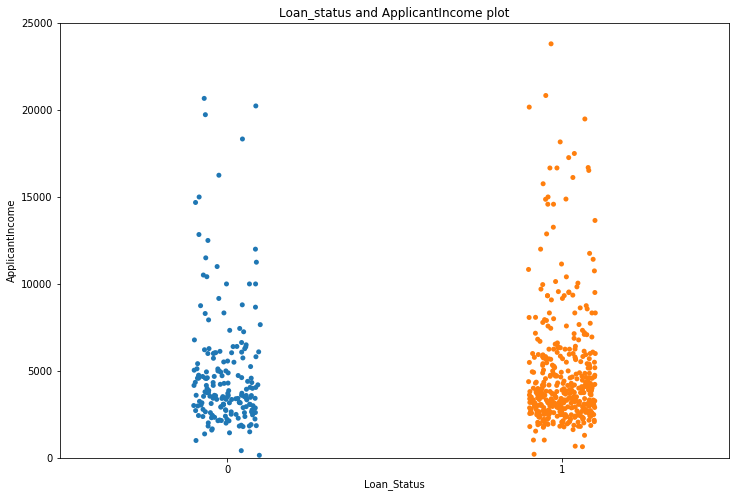

In [155]:
cont_bivariate(train,'ApplicantIncome',25000)

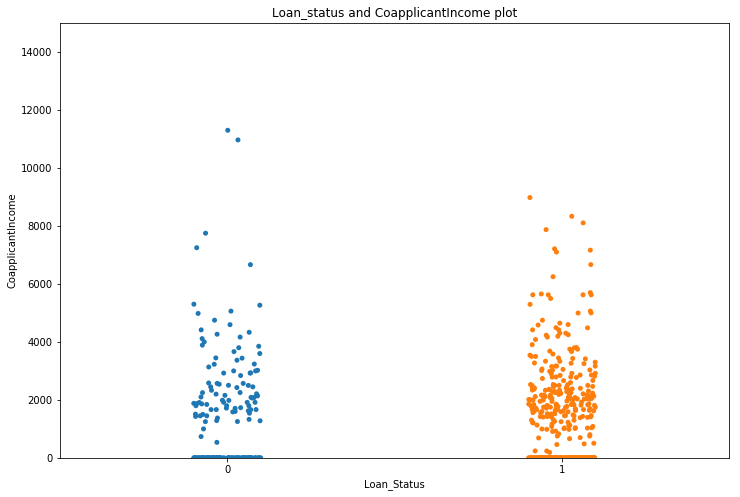

In [157]:
cont_bivariate(train,'CoapplicantIncome',15000)

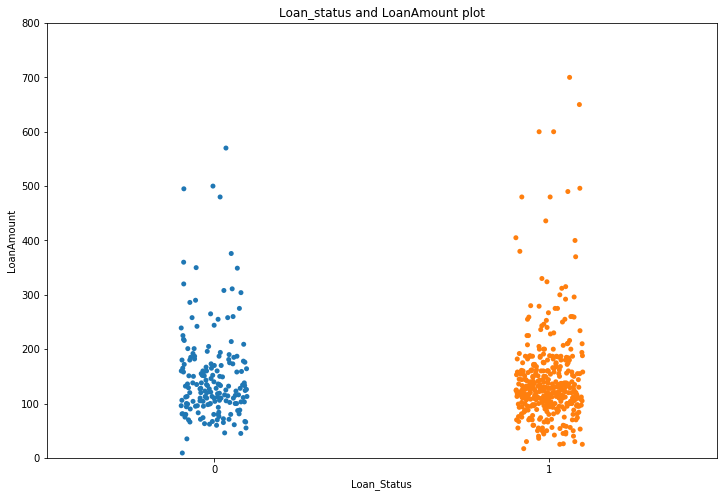

In [158]:
cont_bivariate(train,'LoanAmount',800)

In [161]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [162]:
approval=train[train['Loan_Status']==1]['Loan_Amount_Term']

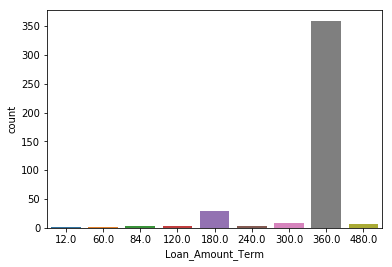

In [163]:
sns.countplot(x=approval,data=train)

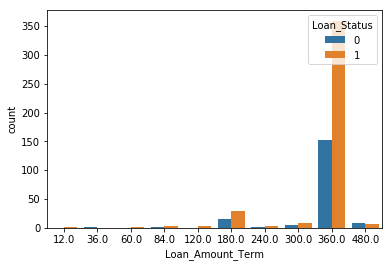

In [166]:
rejection=train[train['Loan_Status']==0]['Loan_Amount_Term']
sns.countplot(x="Loan_Amount_Term",data=train,hue='Loan_Status')

### Lets detect outliers

In [46]:
def outlier_box(df,column):
    plt.figure(figsize=(8,12))
    sns.boxplot(data=df,y=column)

In [47]:
def outlier_violin(df,column):
    plt.figure(figsize=(8,12))
    sns.violinplot(data=df,y=column)

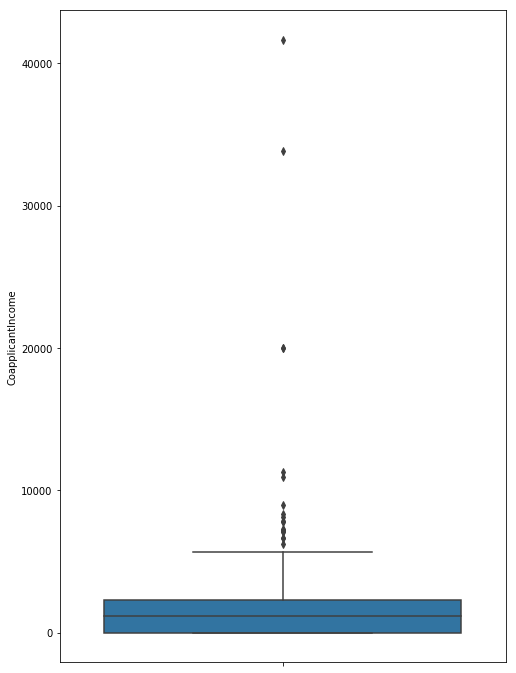

In [48]:
#outlier_violin(train,'CoapplicantIncome')
outlier_box(train,'CoapplicantIncome')

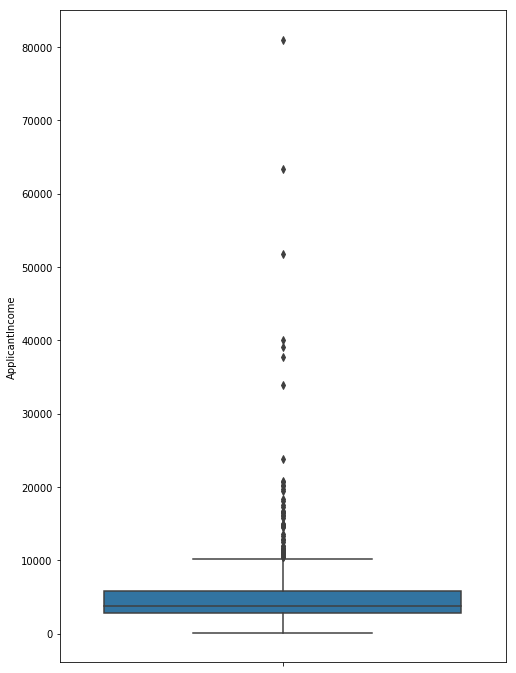

In [49]:
outlier_box(train,'ApplicantIncome')

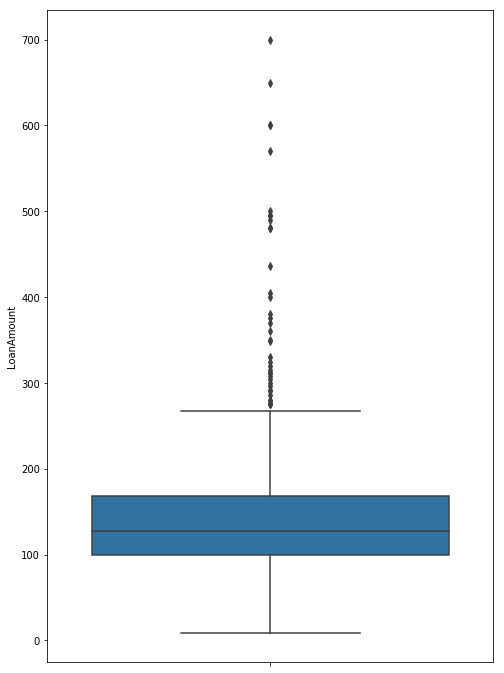

In [50]:
outlier_box(train,'LoanAmount')

In [51]:
### before removing outiers in applicants and coapplicants we would merge these to feature since both has similar trend with target variable
#### with the increase in either of applicants and coapplicants feature chances of Loan_approval increases.

### combine 'ApplicantIncome' and 'CoapplicantIncome'

In [168]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']


In [169]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [170]:
### lets do analysis to confirm our hypothesis ,if confirmed then we would certainly drop ApllicantIncome and CoapplicantIncome features

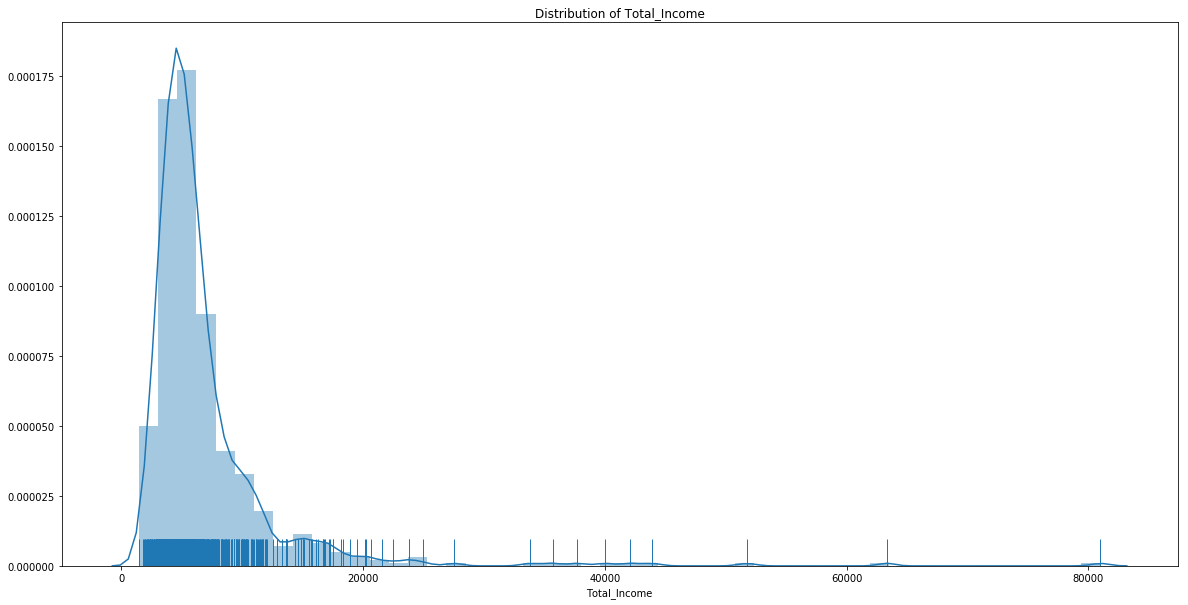

In [172]:
continuous(train,'Total_Income');

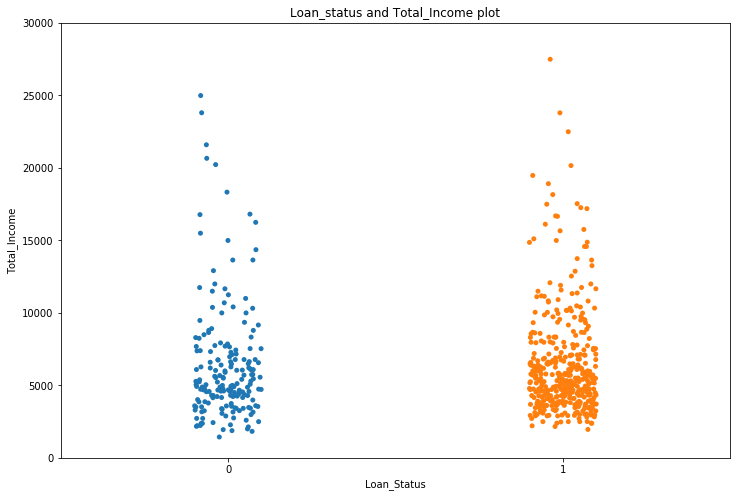

In [174]:
cont_bivariate(train,"Total_Income",30000);

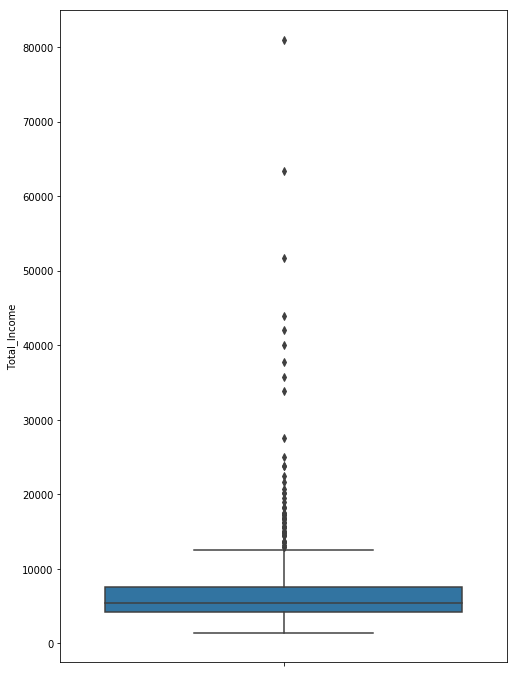

In [175]:
outlier_box(train,'Total_Income')

### drop 'CoapplicantIncome' and "Applicant_Income"

In [179]:
train.drop(labels=["ApplicantIncome",'CoapplicantIncome'],axis=1,inplace=True)

In [181]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test.drop(labels=["ApplicantIncome",'CoapplicantIncome'],axis=1,inplace=True)

In [182]:
test.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,362.000000,361.000000,338.000000,367.000000
mean,136.132597,342.537396,0.825444,6375.177112
std,61.366652,65.156643,0.380150,5199.423594
min,28.000000,6.000000,0.000000,1760.000000
25%,100.250000,360.000000,1.000000,4156.000000
50%,125.000000,360.000000,1.000000,5205.000000
75%,158.000000,360.000000,1.000000,6980.000000
max,550.000000,480.000000,1.000000,72529.000000


In [183]:
train.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
count,592.000000,600.00000,564.000000,614.000000,614.000000
mean,146.412162,342.00000,0.842199,0.687296,7024.705081
std,85.587325,65.12041,0.364878,0.463973,6458.663872
min,9.000000,12.00000,0.000000,0.000000,1442.000000
25%,100.000000,360.00000,1.000000,0.000000,4166.000000
50%,128.000000,360.00000,1.000000,1.000000,5416.500000
75%,168.000000,360.00000,1.000000,1.000000,7521.750000
max,700.000000,480.00000,1.000000,1.000000,81000.000000


#### remove outlier from Total_Income


In [185]:
def Z_score(column)
    mean=train[column].mean()
    std=train[column].std()
    cut_off=std*3
    lower,upper=mean-cut_off,mean+cut_off
    return train[(train[column]<upper)&(train[column]>lower)]

In [188]:
train=Z_score('Total_Income')

In [190]:
train.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
count,582.000000,590.000000,556.000000,604.000000,604.000000
mean,142.738832,342.711864,0.843525,0.688742,6384.688609
std,77.347577,64.592506,0.363632,0.463392,3665.333639
min,9.000000,12.000000,0.000000,0.000000,1442.000000
25%,100.000000,360.000000,1.000000,0.000000,4158.250000
50%,127.000000,360.000000,1.000000,1.000000,5332.500000
75%,165.000000,360.000000,1.000000,1.000000,7295.500000
max,650.000000,480.000000,1.000000,1.000000,24996.000000


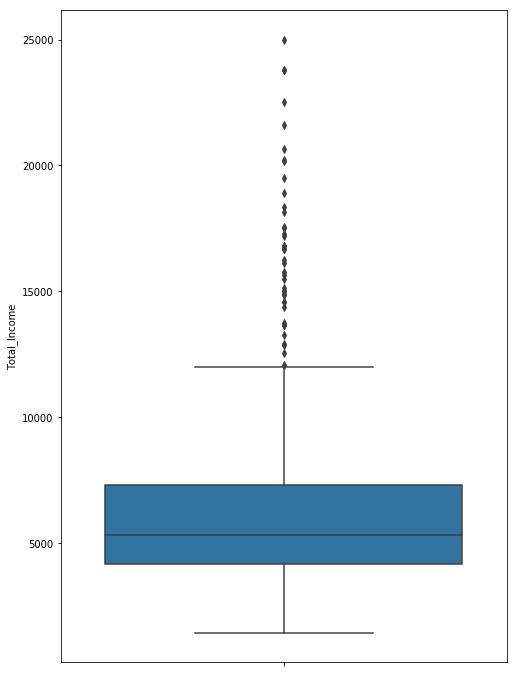

In [191]:
outlier_box(train,'Total_Income')

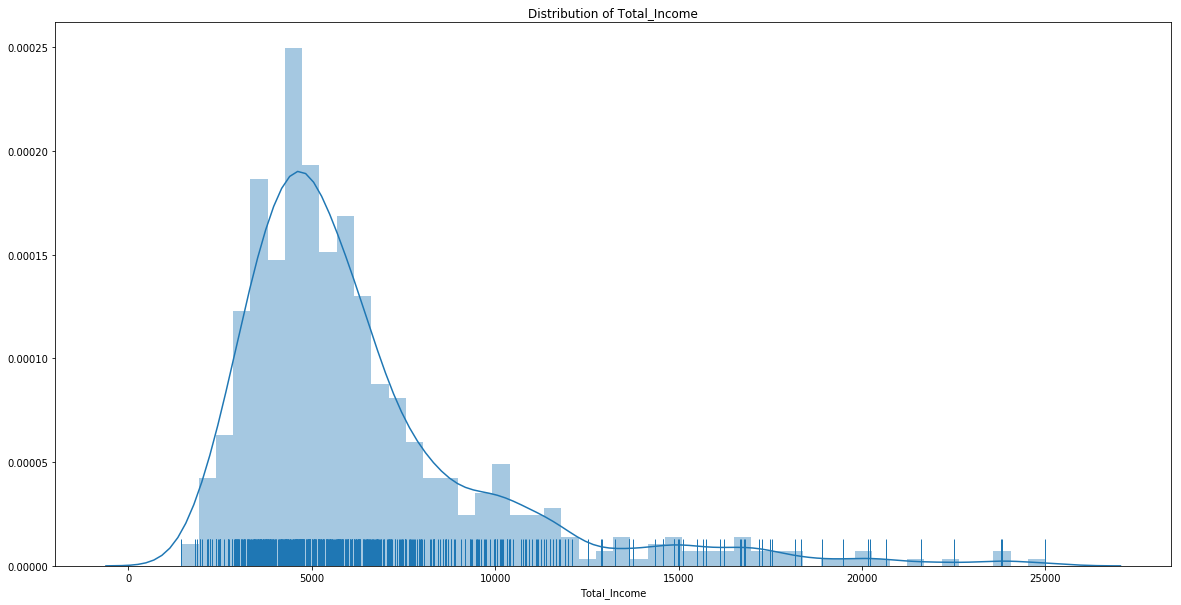

In [192]:
continuous(train,'Total_Income');

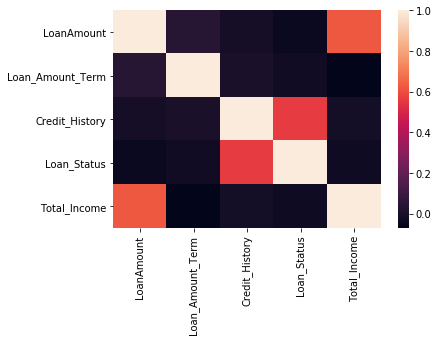

In [180]:
sns.heatmap(train.corr())

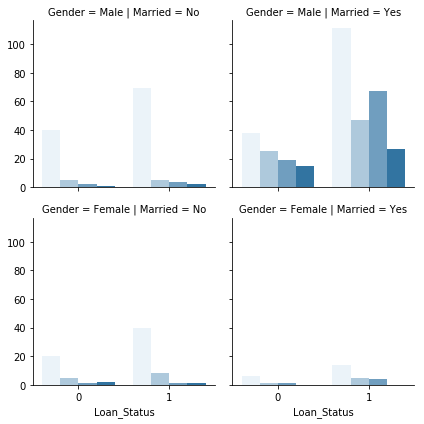

In [58]:
relation = sns.FacetGrid(train, col="Married",  row="Gender",legend_out=True,palette='flare')
relation.map(sns.countplot,'Loan_Status',hue=train['Dependents'],order=None,)

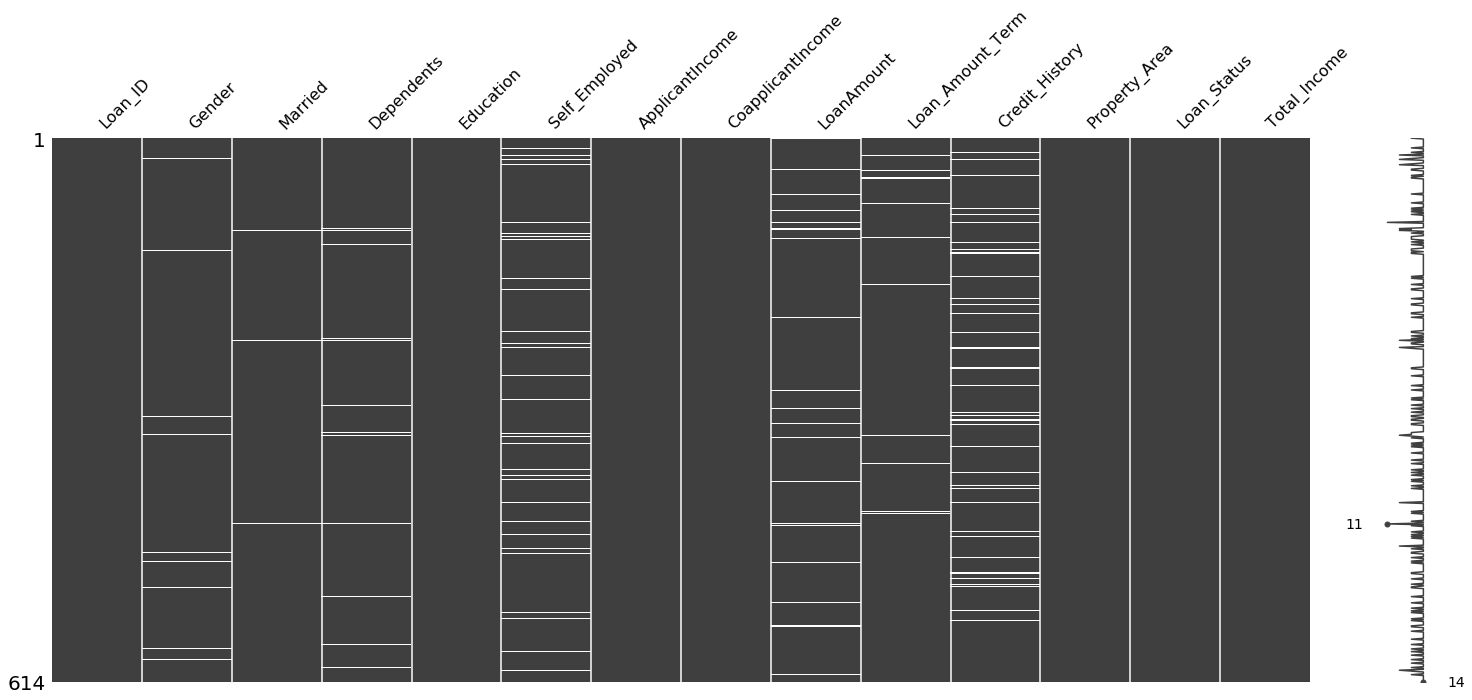

In [59]:
ms.matrix(train)

In [60]:
def calculate_missing_percent(df):
    missing=pd.DataFrame()
    percentage=[]
    count=[]
    total_record=len(df)
    for feature in df.columns:
        cnt=df[feature].isna().sum()
        cal=cnt/total_record
        percentage.append(cal*100)
        count.append(cnt)
    missing['feature']=df.columns
    missing['count of missing values']=count
    missing['missing %']=percentage
    return missing
        
    

In [61]:
calculate_missing_percent(train)

,feature,count of missing values,missing %
0,Loan_ID,0,0.000000
1,Gender,13,2.117264
2,Married,3,0.488599
3,Dependents,15,2.442997
4,Education,0,0.000000
5,Self_Employed,32,5.211726
6,ApplicantIncome,0,0.000000
7,CoapplicantIncome,0,0.000000
8,LoanAmount,22,3.583062
9,Loan_Amount_Term,14,2.280130


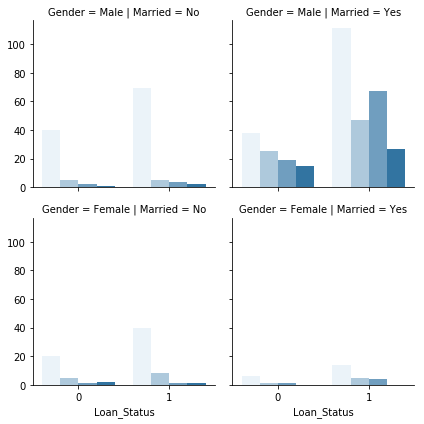

In [66]:
relation = sns.FacetGrid(train, col="Married",  row="Gender",legend_out=True)
relation.map(sns.countplot,'Loan_Status',hue=train['Dependents'],order=None)

In [67]:
train.shape

(614, 14)